In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
preprocessed_data = pd.read_csv(r'/Users/issackondreddy/Desktop/Projects/Fraud Detection System/DS/data/processed_creditcard.csv')

In [3]:
# Separate features and target
X = preprocessed_data.drop('Class', axis=1)
y = preprocessed_data['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [10]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [11]:
model_XG = xgb.XGBClassifier(random_state=42)
model_XG.fit(X_train, y_train)
y_pred_XG = model_XG.predict(X_test)

In [12]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

In [13]:
model_SVC = SVC(random_state=42)
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("="*60)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

Logistic Regression
Metrics for Logistic Regression:
Accuracy: 0.9412
Precision: 0.9534
Recall: 0.8761
F1 Score: 0.9131
ROC-AUC: 0.9264

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     52206
           1       0.95      0.88      0.91     28480

    accuracy                           0.94     80686
   macro avg       0.94      0.93      0.93     80686
weighted avg       0.94      0.94      0.94     80686



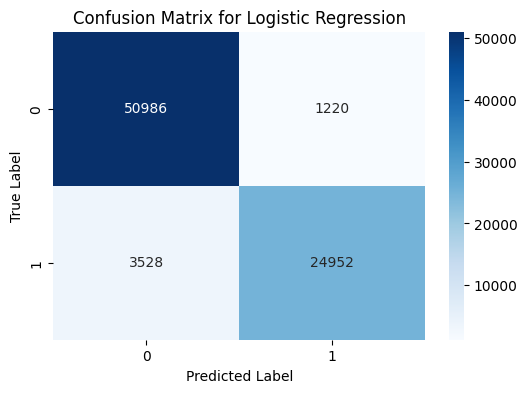

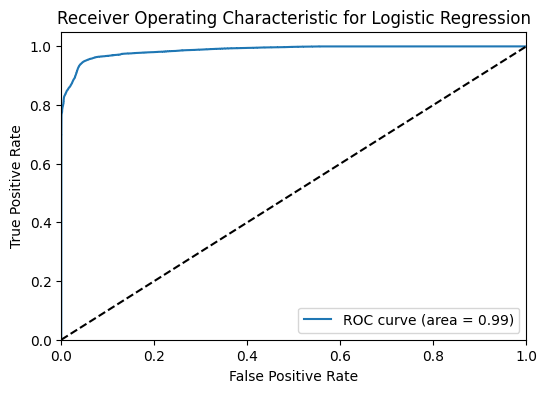

Random Forest
Metrics for Random Forest:
Accuracy: 0.9999
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998
ROC-AUC: 0.9999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52206
           1       1.00      1.00      1.00     28480

    accuracy                           1.00     80686
   macro avg       1.00      1.00      1.00     80686
weighted avg       1.00      1.00      1.00     80686



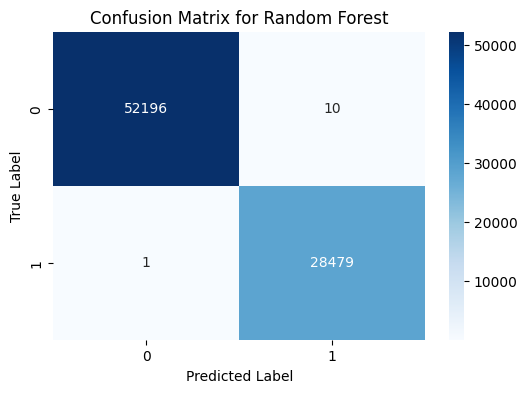

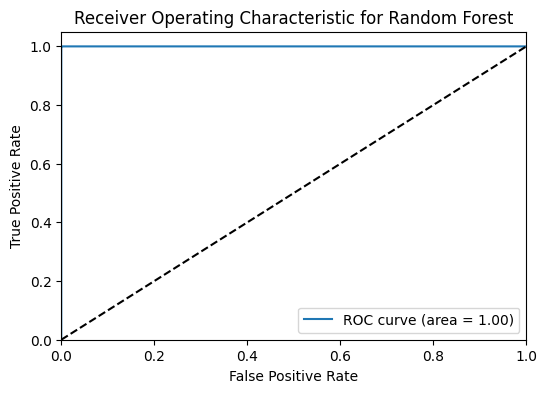

XGBoost
Metrics for XGBoost:
Accuracy: 0.9997
Precision: 0.9993
Recall: 1.0000
F1 Score: 0.9996
ROC-AUC: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52206
           1       1.00      1.00      1.00     28480

    accuracy                           1.00     80686
   macro avg       1.00      1.00      1.00     80686
weighted avg       1.00      1.00      1.00     80686



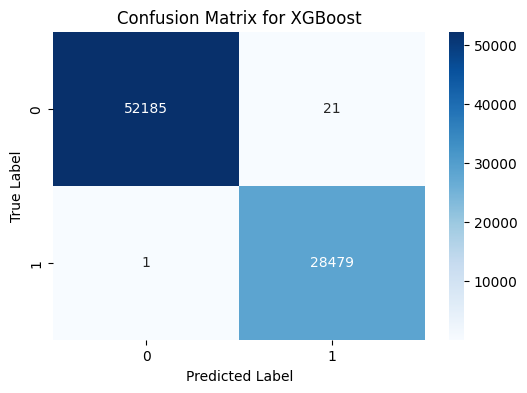

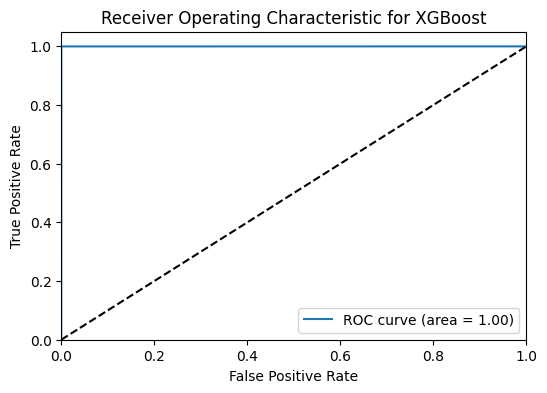

K-Nearest Neighbors
Metrics for K-Nearest Neighbors:
Accuracy: 0.9991
Precision: 0.9974
Recall: 1.0000
F1 Score: 0.9987
ROC-AUC: 0.9993

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52206
           1       1.00      1.00      1.00     28480

    accuracy                           1.00     80686
   macro avg       1.00      1.00      1.00     80686
weighted avg       1.00      1.00      1.00     80686



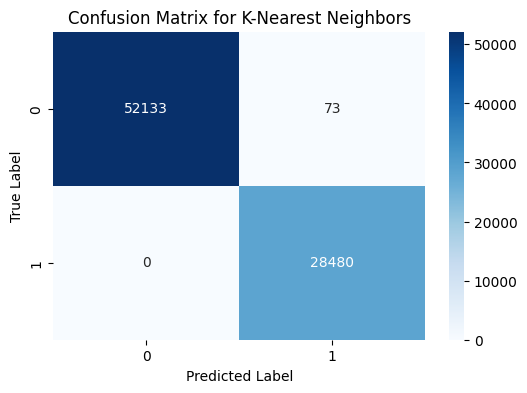

Support Vector Classifier (SVC)
Metrics for Support Vector Classifier:
Accuracy: 0.9935
Precision: 0.9887
Recall: 0.9928
F1 Score: 0.9908
ROC-AUC: 0.9933

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     52206
           1       0.99      0.99      0.99     28480

    accuracy                           0.99     80686
   macro avg       0.99      0.99      0.99     80686
weighted avg       0.99      0.99      0.99     80686



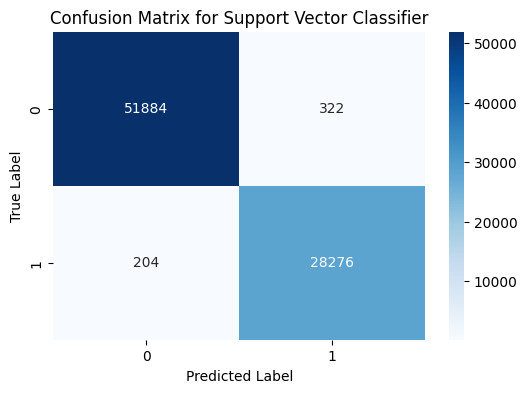

In [15]:
# Logistic Regression
print("Logistic Regression")
print_metrics(y_test, y_pred_LR, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_LR, "Logistic Regression")
plot_roc_curve(y_test, model_LR.predict_proba(X_test), "Logistic Regression")

# Random Forest
print("Random Forest")
print_metrics(y_test, y_pred_RF, "Random Forest")
plot_confusion_matrix(y_test, y_pred_RF, "Random Forest")
plot_roc_curve(y_test, model_RF.predict_proba(X_test), "Random Forest")

# XGBoost
print("XGBoost")
print_metrics(y_test, y_pred_XG, "XGBoost")
plot_confusion_matrix(y_test, y_pred_XG, "XGBoost")
plot_roc_curve(y_test, model_XG.predict_proba(X_test), "XGBoost")

# K-Nearest Neighbors
print("K-Nearest Neighbors")
print_metrics(y_test, y_pred_KNN, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_KNN, "K-Nearest Neighbors")

# Support Vector Classifier (SVC)
print("Support Vector Classifier (SVC)")
print_metrics(y_test, y_pred_SVC, "Support Vector Classifier")
plot_confusion_matrix(y_test, y_pred_SVC, "Support Vector Classifier")